# End of Distribution Imputation

Here, the NaN values are replaced with those values which are at the tail-end of the underlying distribution of the variable.

If normally distributed, we use the mean +/- 3 times Standard Deviation.

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

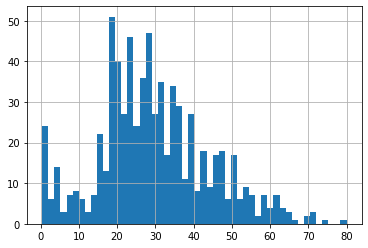

In [8]:
df.Age.hist(bins=50)

In [9]:
#Choosing that value which is at the end of distribution (3 std. deviations later)

extreme=df.Age.mean()+3*df.Age.std()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

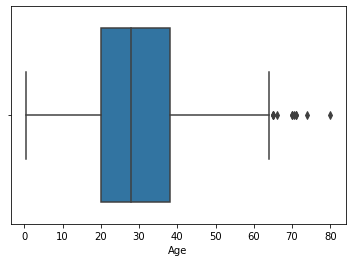

In [11]:
#Observe the outliers

import seaborn as sns
sns.boxplot('Age',data=df)

In [12]:
def impute_nan(df,variable,median,extreme):
    
    #Creating a new column(Age_end_distribution) and filling NaN values with (End of Distribution values)
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [13]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [14]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

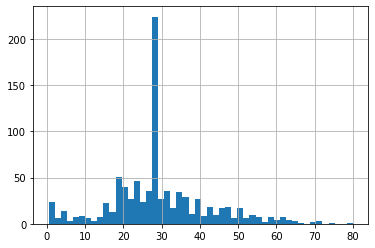

In [15]:
df['Age'].hist(bins=50)

<AxesSubplot:>

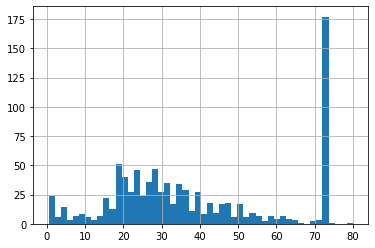

In [16]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

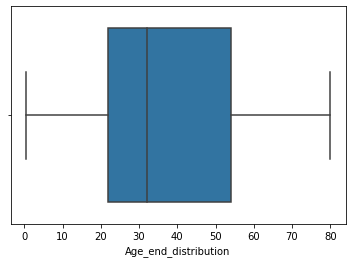

In [18]:
#Observe that outliers are not present

sns.boxplot('Age_end_distribution',data=df)